In [1]:
import os
import folium

In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [3]:
df_train_full = pd.read_csv('../data/train.csv',index_col=0)

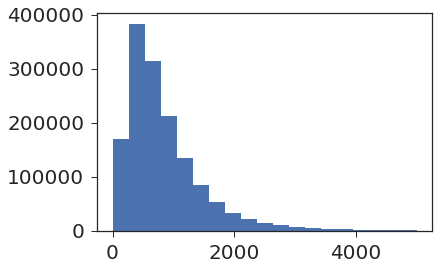

In [4]:
df_train_full.head()
plt.hist(df_train_full.trip_duration,bins=np.linspace(0,5000,20));

In [5]:
df_train=df_train_full.sample(n=10000)
df_train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id3366081,1,2016-02-28 12:34:53,2016-02-28 12:47:23,1,-73.985519,40.759560,-73.994926,40.750137,N,750
id3154090,1,2016-03-31 06:01:54,2016-03-31 06:13:08,1,-73.967834,40.787300,-73.995178,40.750259,N,674
id1420422,2,2016-04-19 15:06:20,2016-04-19 15:09:53,6,-73.990417,40.718948,-73.990417,40.718948,N,213
id2697656,2,2016-06-14 22:52:42,2016-06-14 23:08:03,1,-73.990067,40.760780,-73.952019,40.784309,N,921
id2146330,1,2016-05-31 21:15:39,2016-05-31 21:17:43,1,-74.007423,40.743473,-74.004524,40.752186,N,124


In [29]:
xx=datetime.strptime(df_train['pickup_datetime'][2],"%Y-%m-%d %H:%M:%S")
xx.hour

19

In [14]:
from datetime import datetime
tmp=df_train.pickup_datetime.apply(lambda x: \
    datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

df_train=df_train.assign(pickup_date=tmp.apply(lambda x: x.date()))
df_train=df_train.assign(pickup_time=tmp.apply(lambda x: x.time()))
df_train=df_train.assign(pickup_hour=tmp.map(lambda x: x.hour))
df_train=df_train.assign(dropoff_date=tmp.apply(lambda x: x.date()))
df_train=df_train.assign(dropoff_time=tmp.apply(lambda x: x.time()))
df_train=df_train.assign(dropoff_hour=tmp.map(lambda x: x.hour))



# df_train.assign(pickup_time=tmp.apply(lambda x: x.time()))
# df_train.assign(pickup_hour=tmp.map(lambda x: x.hour))
df_train.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_date', 'pickup_time', 'pickup_hour', 'dropoff_date',
       'dropoff_time', 'dropoff_hour'],
      dtype='object')

# Average the data based on date/time

In [37]:
df_date=df_train.groupby('pickup_date').mean().reset_index()
df_date.head()

,pickup_date,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2016-01-01,1.666667,2.166667,-73.989155,40.750645,-73.989473,40.739237,493.833333
1,2016-01-02,1.250000,1.250000,-73.980244,40.750344,-73.958046,40.778344,764.750000
2,2016-01-03,1.200000,1.400000,-73.982416,40.742027,-73.955853,40.741061,722.400000
3,2016-01-04,1.250000,1.250000,-73.943615,40.783234,-73.928524,40.761767,754.250000
4,2016-01-05,1.500000,1.833333,-73.976608,40.744035,-73.973045,40.745382,535.000000


In [19]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,tmp
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2016-03-26


(7.341e+05, 7.345e+05)

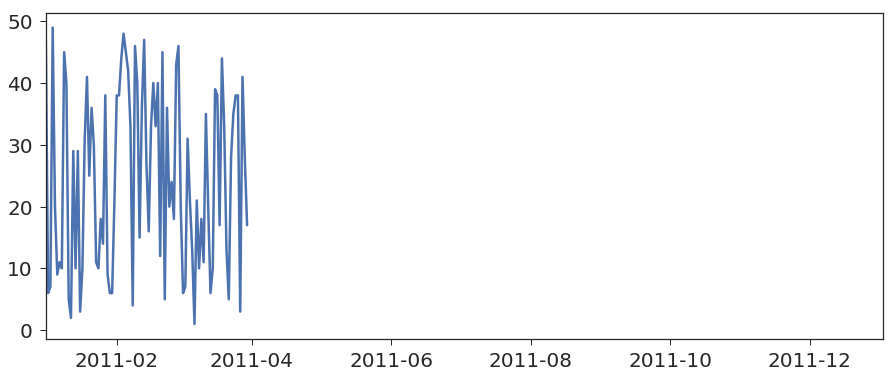

In [47]:
# create a random dataframe with datetimeindex
dateRange = pd.date_range('1/1/2011', '3/30/2011', freq='D')
randomInts = np.random.randint(1, 50, len(dateRange))
df = pd.DataFrame({'RandomValues' : randomInts}, index=dateRange)

fig, ax = plt.subplots(figsize=(15,6))
ax.plot('RandomValues', data=df)
ax.set_xlim(['1/1/2011','1/2/2012'])

In [17]:
df_train.pickup_datetime.min()

'2016-01-01 00:25:42'

In [18]:
#check the decoration
df_train.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_date', 'pickup_time', 'pickup_hour', 'dropoff_date',
       'dropoff_time', 'dropoff_hour'],
      dtype='object')

In [19]:
import shapefile
sub_shp=open('../data/Subway_Stations/geo_export_5d2a41e3-2a81-42a2-98d5-b317da5c00c2.shp','rb')
sub_dbf=open('../data/Subway_Stations/geo_export_5d2a41e3-2a81-42a2-98d5-b317da5c00c2.dbf','rb')
sf=shapefile.Reader(shp=sub_shp,dbf=sub_dbf)
records = sf.shapeRecords()

In [20]:
# is it xy data (1)??
sf.shapes()[0].shapeType

1

In [21]:
# fields
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['notes', 'C', 254, 0],
 ['url', 'C', 254, 0],
 ['name', 'C', 254, 0],
 ['objectid', 'N', 33, 31],
 ['line', 'C', 254, 0]]

In [22]:
# print the station names
for itr in records[:3]:
    print(itr.record[2], itr.shape.points[0])

Astor Pl [-73.99106999861966, 40.73005400028978]
Canal St [-74.00019299927328, 40.71880300107709]
50th St [-73.98384899986625, 40.76172799961419]


In [26]:
import folium
ny_map=folium.Map(location=[40.76172799961419,-73.98384899986625],zoom_start=13)
for itr in records[:]:
    lng,lat = itr.shape.points[0]
    folium.RegularPolygonMarker(
        [lat,lng],
        popup=itr.record[2],fill_color='black',number_of_sides=10,radius=7).add_to(ny_map)

#save the map so we can see on git hub
ny_map.save('sub_map.html')
ny_map

In [57]:
folium.RegularPolygonMarker?

In [62]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Define a function that finds the nearest subway station

In [65]:
from geopy.distance import great_circle
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(great_circle(newport_ri, cleveland_oh).miles)

537.1485284062816


In [ ]:
def dist_to_nearest(df_train):
    records

In [95]:
from folium import plugins
df=df_train.head(3)
for itr in df: 
    folium.RegularPolygonMarker(
        [lat,lng],
        popup=itr.record[2],fill_color='red',number_of_sides=10,radius=3).add_to(ny_map)
ny_map

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [93]:
[df['pickup_latitude'].values,df['pickup_longitude'].values,df['trip_duration'].values]

[array([ 40.76793671,  40.73856354,  40.7639389 ,  40.7199707 ,
         40.79320908,  40.74219513,  40.7578392 ,  40.79777908,
         40.73839951,  40.74433899,  40.76383972,  40.74943924,
         40.75667953,  40.76794052,  40.72722626,  40.76859283,
         40.75556183,  40.74580383,  40.7130127 ,  40.73819733]),
 array([-73.98215485, -73.98041534, -73.97902679, -74.01004028,
        -73.97305298, -73.98285675, -73.96901703, -73.96927643,
        -73.9994812 , -73.98104858, -73.98265076, -73.99153137,
        -73.96298218, -73.95630646, -73.99219513, -73.955513  ,
        -73.99116516, -73.99425507, -74.00398254, -73.98388672]),
 array([ 455,  663, 2124,  429,  435,  443,  341, 1551,  255, 1225, 1274,
        1128, 1114,  260, 1414,  211, 2316,  731, 1317,  251])]

In [70]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


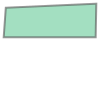

In [101]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)
poly

In [139]:
import shapefile
nb_shp=open('./data/nycmih_20170815/nycmih_20170815.shp','rb')
nb_dbf=open('./data/nycmih_20170815/nycmih_20170815.dbf','rb')
sf_nb=shapefile.Reader(shp=nb_shp,dbf=nb_dbf)
nb_rec = sf_nb.shapeRecords()

In [140]:
sf_nb.shapes()[0].shapeType

5

In [141]:
sf_nb.fields

[('DeletionFlag', 'C', 1, 0),
 ['Boro', 'C', 2, 0],
 ['Status', 'C', 20, 0],
 ['ProjectNam', 'C', 50, 0],
 ['DateAdopte', 'D', 8, 0],
 ['ZR_ULURPno', 'C', 10, 0],
 ['ZR_Map', 'C', 20, 0],
 ['CD', 'C', 20, 0],
 ['MIH_Option', 'C', 50, 0],
 ['Zoning_Map', 'C', 50, 0],
 ['SHAPE_STAr', 'F', 19, 11],
 ['SHAPE_STLe', 'F', 19, 11]]

In [133]:
filtered = filter(lambda f: f['properties']['COUNTYFP']=='061', nb_rec)


In [134]:
for itr,irec in enumerate(filtered):
    print(irec.record[:], irec.shape.points[0])

TypeError: '_ShapeRecord' object is not subscriptable

In [131]:
nb_rec.record

AttributeError: 'list' object has no attribute 'record'

In [143]:
import geopandas as gpd
data = gpd.read_file('./data/nynta_17c/nynta.shp')
data

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.228028,5.400502e+07,"POLYGON ((990897.9000244141 169268.1207885742,..."
1,4,Queens,081,QN52,East Flushing,25843.364936,2.945438e+07,"POLYGON ((1041061.948242188 215429.4609985352,..."
2,4,Queens,081,QN48,Auburndale,32446.878673,3.416422e+07,"POLYGON ((1046392.971191406 210169.7536010742,..."
3,4,Queens,081,QN51,Murray Hill,33266.904811,5.248828e+07,"POLYGON ((1038593.459228516 221913.3550415039,..."
4,4,Queens,081,QN27,East Elmhurst,19816.712124,1.972685e+07,"POLYGON ((1022728.274841309 217530.8082275391,..."
5,2,Bronx,005,BX35,Morrisania-Melrose,27740.845668,1.689175e+07,"POLYGON ((1012761.805786133 243267.4125976562,..."
6,4,Queens,081,QN07,Hollis,20976.335574,2.288777e+07,"POLYGON ((1051539.66003418 201007.0130004883, ..."
7,1,Manhattan,061,MN06,Manhattanville,17040.685164,1.064708e+07,"POLYGON ((999174.2606201172 238490.1047973633,..."
8,4,Queens,081,QN02,Springfield Gardens North,25433.582525,2.842844e+07,"POLYGON ((1050734.88458252 185328.1342163086, ..."
9,4,Queens,081,QN46,Bayside-Bayside Hills,43014.805294,8.079754e+07,"POLYGON ((1048560.005187988 223080.083190918, ..."
